In [1]:
"""
    读取数据
    Parameters:
        fileName - 文件名
    Returns:
        dataMat - 数据矩阵
        labelMat - 数据标签
    """
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch06\testSet.txt')
    for line in fr.readlines(): #逐行读取
        lineArr = line.strip().split('\t')#滤除空格
        dataMat.append([float(lineArr[0]), float(lineArr[1])]) #添加数据
        labelMat.append(float(lineArr[2])) #添加标签
    return dataMat,labelMat
"""
    函数说明:随机选择alpha_j的索引值

    Parameters:
        i - alpha的下标
        m - alpha参数个数
    Returns:
        j - alpha_j的索引值
    """
def selectJrand(i, m):
    
    j = i  #选择一个不等于i的j
    while (j == i):#只要函数值不等于输入值i，函数就会进行随机选择
        j = int(random.uniform(0, m))
    return j
"""
    调整大于H或小于L的alpha值
    Parameters：
        oS - 数据结构
        k - 标号为k的数据的索引值
    Returns:
        aj - 修剪后的alpah_j的值
    """
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
dataMat, labelMat = loadDataSet('testSet.txt')#读取数据
print(labelMat)

[-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [7]:
#输入参数 数据集，类别标签，常数C，容错率，退出前最大的循环次数
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); 
    labelMat = np.mat(classLabels).transpose()#将标签进行转置处理，降维为一维数组进行存储
    #初始化b参数，统计dataMatrix的维度
    b = 0; 
    m,n = np.shape(dataMatrix)#m=100 n=2
    #初始化alpha参数，设为0  100行1列的0矩阵
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数，用来存储在没有任何alpha改变的情况下遍历数据集的次数
    iter_num = 0
    #最多迭代matIter次指没有任何alpha改变的情况下遍历数据集的次数
    #只有在所有数据集上遍历maxIter次，且不再发生任何alpha修改之后，程序才停止
    while (iter_num < maxIter):
        alphaPairsChanged = 0#每次循环alphaPairsChanged先设为0，用来记录alpha是否已经进行优化
        for i in range(m):#对整个集合顺序遍历
            #步骤1：计算误差Ei  
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b#我们预测的类别
            Ei = fXi - float(labelMat[i])#基于该实例的预测结果和真实结果的比对，计算误差
            #优化alpha，更设定一定的容错率。toler=0.001 C=0.6 
            #不管是正间隔还是负间隔都会被测试，并同时检查alpha值，以保证其不能等于0或C
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)#利用辅助函数来随机选择第二个alpha值
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝 深拷贝即拷贝之后的对象不随原对象变化，即为新值分配内存
                alphaIold = alphas[i].copy();
                alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H用于把alpha[j]调整到0到C之间
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: #不做任何改变
                    print("L==H"); 
                    continue#本次循环结束直接运行下一次for循环
                #步骤3：计算eta是alpha[j]的最优修改量
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: #退出for循环的当前迭代过程
                    print("eta>=0"); 
                    continue
                #步骤4：计算新的alpha_j，并用辅助函数以及L与H值对其进行调整
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                #判断alphas[j]是否有轻微改变，若有退出for循环
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i，改变的方向和alphas[j]相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #若执行到这一步都没有continue,说明成功改变了一对alpha
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数，
        if (alphaPairsChanged == 0): 
            iter_num += 1
        else: iter_num = 0#若有更新，将iter设为0后继续运行程序，
        #一直等到在所有数据集上遍历maxIter次且不再发生任何alpha修改之后程序停止并退出while()循环
        print("迭代次数: %d" % iter_num)
    return b,alphas

In [8]:
b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)


L==H
L==H
第0次迭代 样本:2, alpha优化次数:1
L==H
第0次迭代 样本:4, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
L==H
L==H
L==H
第0次迭代 样本:26, alpha优化次数:3
第0次迭代 样本:29, alpha优化次数:4
第0次迭代 样本:31, alpha优化次数:5
alpha_j变化太小
L==H
alpha_j变化太小
第0次迭代 样本:46, alpha优化次数:6
L==H
第0次迭代 样本:55, alpha优化次数:7
alpha_j变化太小
alpha_j变化太小
L==H
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:8, alpha优化次数:1
alpha_j变化太小
第0次迭代 样本:17, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:4, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:31, alpha优化次数:2
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:69, alpha优化次数:3
alpha_j变化太小
L==H
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:62, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:8, alpha优化次数:1
alp

alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
第7次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
第1次迭代 样本:17, alpha优化次数:1
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:52, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alph

alpha_j变化太小
alpha_j变化太小
迭代次数: 13
alpha_j变化太小
alpha_j变化太小
迭代次数: 14
alpha_j变化太小
alpha_j变化太小
迭代次数: 15
alpha_j变化太小
alpha_j变化太小
迭代次数: 16
alpha_j变化太小
alpha_j变化太小
迭代次数: 17
alpha_j变化太小
alpha_j变化太小
迭代次数: 18
alpha_j变化太小
alpha_j变化太小
迭代次数: 19
alpha_j变化太小
alpha_j变化太小
迭代次数: 20
alpha_j变化太小
alpha_j变化太小
迭代次数: 21
alpha_j变化太小
alpha_j变化太小
迭代次数: 22
alpha_j变化太小
alpha_j变化太小
迭代次数: 23
alpha_j变化太小
alpha_j变化太小
迭代次数: 24
alpha_j变化太小
alpha_j变化太小
迭代次数: 25
alpha_j变化太小
alpha_j变化太小
迭代次数: 26
alpha_j变化太小
alpha_j变化太小
迭代次数: 27
alpha_j变化太小
alpha_j变化太小
迭代次数: 28
alpha_j变化太小
alpha_j变化太小
迭代次数: 29
alpha_j变化太小
alpha_j变化太小
迭代次数: 30
第30次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
第8次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alp

In [6]:
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import random
import types

In [9]:
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()

In [11]:
#计算w
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()


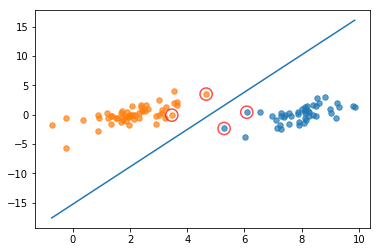

In [12]:
#b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
w = get_w(dataMat, labelMat, alphas)
showClassifer(dataMat, w, b)